In [1]:
import fluxback as fb
import fluxback.activation as act

In [2]:
x = fb.tensor(2., requires_grad=True)
y = fb.tensor(3., requires_grad=True)

z = (x*x) + 2.*(x*y)

z

tensor(16.0)

In [3]:
z.zero()
z.back()

In [4]:
x.grad

array(10.)

In [5]:
y.grad

array(4.)

In [6]:
y = fb.tensor.randn((), requires_grad=True)

z = 1. - y

z.zero()
z.back()

print(y.grad)

-1.0


### Unary operators

In [7]:
# negation
a = fb.tensor(2., requires_grad=True)
b = -a

b.zero()
b.back()

a.grad

array(-1.)

In [8]:
# absolute value
a = fb.tensor([3., -2.], requires_grad=True)

b = abs(a).sum()

b.zero()
b.back()

a.grad

array([ 1., -1.])

## Softmax

In [9]:
x = fb.tensor([0., 3., 5.], requires_grad=True)

ex = x.exp()

y = ex / ex.sum()

label = fb.tensor([0., 0., 1.])

loss = abs(y - label).sum()

print(y)

loss.zero()
loss.back()

x.grad

tensor([0.00589975 0.11849965 0.8756006 ])


array([ 0.0162314 ,  0.32601639, -1.09344898])

# Leaky ReLU

In [10]:
x = fb.tensor([0., -3., 5.], requires_grad=True)

y = x.max(0.1 * x)

print(y)

tensor([ 0.  -0.3  5. ])


# Tensor reshaping

In [11]:
a = fb.tensor([[1., 2.], [3., 4.]], requires_grad=True)
b = a.reshape((4,)).sum()

b.zero()
b.back()
a.grad

array([[1., 1.],
       [1., 1.]])

## Matrix multiplication

In [12]:
a = fb.tensor([[1., 2.], [3., 4.]], requires_grad=True)
b = fb.tensor([5., 6.], requires_grad=True)

c = a @ b

g = c.sum()

g.zero()
g.back()

a.grad

array([[11., 11.],
       [11., 11.]])

In [13]:
b.grad

array([4., 6.])

# Activation

In [14]:
x = fb.tensor([-1., 0., 1.], requires_grad=True)
sigmoid = act.Sigmoid()
y = sigmoid(x)
z = y.sum()

z.zero()
z.back()

x.grad

array([0.19661193, 0.25      , 0.19661193])

In [15]:
(y.grad * y.values * (1. - y.values)).shape

(3,)

In [16]:
x.values.shape

(3,)

In [17]:
y.values.shape

(3,)

In [18]:
y.grad.shape

(3,)

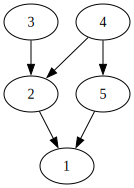

In [19]:
x = fb.tensor(2., requires_grad=True)
y = fb.tensor(3., requires_grad=True)

z = (x*x) + (x*y)

z.graphviz()